In [15]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.autograd import Function
from torch.nn.modules.module import Module
from torch.nn.functional import fold, unfold
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [20]:

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
mnist = datasets.MNIST('./data', download = True, transform = transform)
data_loader = torch.utils.data.DataLoader(mnist,
                                          batch_size=32,
                                          shuffle=True,
                                          num_workers=2)
mnistTest = datasets.MNIST('./data', download = True, train=False, transform = transform)
data_loader_test = torch.utils.data.DataLoader(mnistTest,
                                          batch_size=32,
                                          shuffle=True,
                                          num_workers=2)


In [25]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.uniform_(m.weight,-1.0,1.0)
        # torch.nn.init.zeros_(m.weight)

def define_model(input_size, hidden_size, output_size):
    
    return nn.Sequential(
        nn.Linear(input_size * input_size, 300),
        nn.Sigmoid(),
        nn.Linear(300, 200),
        nn.Sigmoid(),
        nn.Linear(200, output_size),
        nn.LogSoftmax(dim=1)
    )

def train(epochs, lr, input_size, hidden_size, output_size, train_loader, test_loader):
    model = define_model(input_size, hidden_size, output_size)
    model.apply(init_weights)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    lossArr = []
    epochArr = []
    bsize = 0
    lossValue = 0
    for epoch in range(epochs):
        for i, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            data = data.view(-1, input_size*input_size)
            yhat = model(data)
            loss = nn.CrossEntropyLoss()(yhat,target)
            lossValue += loss.item()
            loss.backward()
            optimizer.step()
            bsize = bsize + 1
        if(epoch % 5 == 4):
            lossArr.append(lossValue/bsize)
            epochArr.append(epoch)
            print(lossArr, epochArr)
    count = 0
    total = 0
    plt.plot(epochArr, lossArr)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    for i, (data, target) in enumerate(test_loader):
        data = data.view(-1, input_size*input_size)
        yhat = model(data)
        predicted = torch.argmax(yhat,dim=1)
        count = count + torch.sum(predicted == target)
        total += yhat.size(0)
            
    print(epoch,"accuracy",count/total)
            
            


[0.7667306951022148] [4]
[0.7667306951022148, 0.5775664824414253] [4, 9]
[0.7667306951022148, 0.5775664824414253, 0.49015538587556945] [4, 9, 14]
[0.7667306951022148, 0.5775664824414253, 0.49015538587556945, 0.4360203313376506] [4, 9, 14, 19]
[0.7667306951022148, 0.5775664824414253, 0.49015538587556945, 0.4360203313376506, 0.3977352725120783] [4, 9, 14, 19, 24]
[0.7667306951022148, 0.5775664824414253, 0.49015538587556945, 0.4360203313376506, 0.3977352725120783, 0.3685070764990648] [4, 9, 14, 19, 24, 29]
[0.7667306951022148, 0.5775664824414253, 0.49015538587556945, 0.4360203313376506, 0.3977352725120783, 0.3685070764990648, 0.34508180964025714] [4, 9, 14, 19, 24, 29, 34]
[0.7667306951022148, 0.5775664824414253, 0.49015538587556945, 0.4360203313376506, 0.3977352725120783, 0.3685070764990648, 0.34508180964025714, 0.32562044624275216] [4, 9, 14, 19, 24, 29, 34, 39]
[0.7667306951022148, 0.5775664824414253, 0.49015538587556945, 0.4360203313376506, 0.3977352725120783, 0.3685070764990648, 0.34

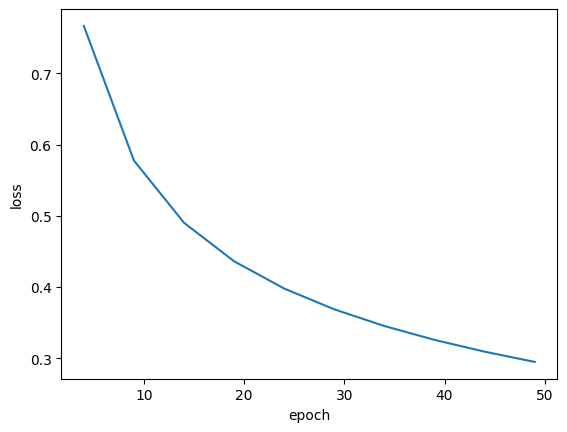

In [26]:
train(50,0.01,28,300,10,data_loader,data_loader_test)